In [99]:
import numpy as np
import matplotlib.pyplot as plt

rb_data = np.load('rb_data.npy')
gate_lens = 2**(np.array(range(1, 7)))
from matplotlib import pyplot

In [101]:
import pandas as pd
import seaborn as sns
from scipy import optimize as opt
sns.set_style("white")

In [102]:
data = []
titles = ['Calibrated', 'Pulse1', 'Pulse2', 'Pulse3', 'Pulse4', 'Randomized']
for exp_ind in [1,2,3,4,0,5]:
    for length in range(len(gate_lens)):
        for click in range(10):
            data += [[titles[exp_ind], gate_lens[length], 1-rb_data[exp_ind][length][click]]]
df = pd.DataFrame(data=data, columns=['experiment', 'length', 'survival'])

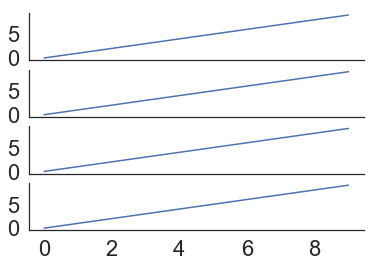

In [123]:
plt.subplot(4,1,1)
plt.plot(range(10))
plt.subplot(4,1,2)
plt.plot(range(10))
plt.subplot(4,1,3)
plt.plot(range(10))
sns.despine(bottom=True)
plt.subplot(4,1,4)
plt.plot(range(10))
sns.despine(bottom=False)

NameError: name 'ax1' is not defined

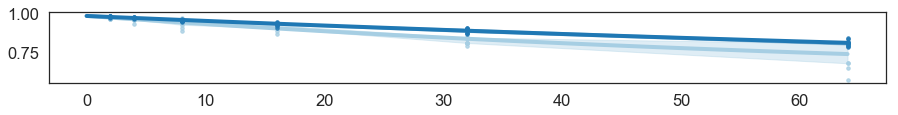

In [140]:
model = lambda n,a,b,p: a*p**n + b
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
sns.set_style('white')

colors = ['#a6cee3','#1f78b4',]

for pulseind in range(1,5):
    plt.subplot(4,1,pulseind)
    for ind, title in enumerate([ titles[pulseind],titles[0]]):
        mydf = df.query("experiment == '{}'".format(title))
        means = mydf.groupby('length',as_index=False).mean()
        popt, pcov = opt.curve_fit(model, means['length'].values,means['survival'].values, p0=[.5,.9,.5], bounds = (0,1))

        plt.plot(mydf['length'].values,mydf['survival'].values,'.', color=colors[ind],markersize=7,alpha=0.8,
                label = "Control shape {}".format(ind))    
        plt.plot(range(max(gate_lens)+1), model(range(max(gate_lens)+1), *popt), color = colors[ind], linewidth=4,
                label=r"     p = {:.3f}".format(popt[-1]))

        plt.fill_between(gate_lens, 
                         mydf.groupby('length').quantile(.25)['survival'].values,
                         mydf.groupby('length').quantile(.75)['survival'].values, alpha=0.35, color=colors[ind])
    plt.setp(ax1.get_xticklabels(), visible=False)
plt.title("Randomized benchmarking for uncompensated gates", fontsize=25)
plt.ylim(0.6,1)
# plt.legend(loc='lower left',numpoints=4, fontsize=17)
plt.xlabel('Circuit length', fontsize=22)
plt.ylabel('Survival probability', fontsize=22)
sns.despine(bottom=True)

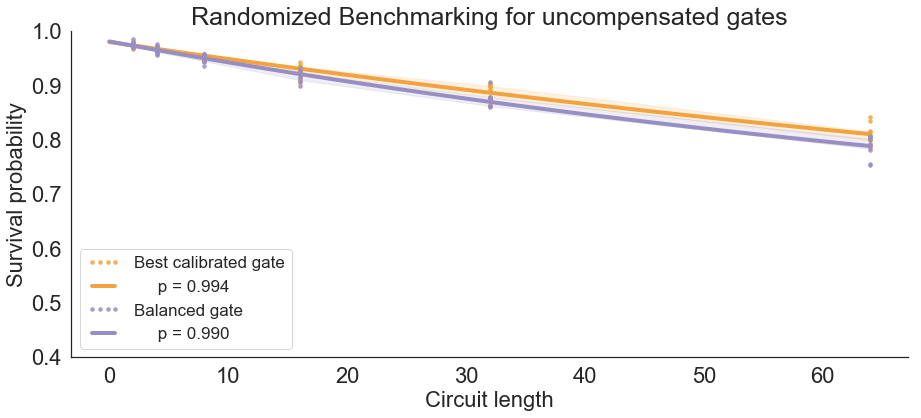

In [98]:
colors = ['#f1a340','#998ec3']
model = lambda n,a,b,p: a*p**n + b
plt.figure(figsize=(15,6))
sns.set(font_scale=2)
sns.set_style('white')
labels = ['Best calibrated gate', 'Balanced gate']
for ind, title in enumerate([titles[0],titles[-1]]):
#     plt.subplot(411+ind)
    mydf = df.query("experiment == '{}'".format(title))
    means = mydf.groupby('length',as_index=False).mean()
    popt, pcov = opt.curve_fit(model, means['length'].values,means['survival'].values, p0=[.5,.9,.5], bounds = (0,1))

    plt.plot(mydf['length'].values,mydf['survival'].values,'.', color=colors[ind],markersize=7,alpha=0.8,
            label = labels[ind])    
    plt.plot(range(max(gate_lens)+1), model(range(max(gate_lens)+1), *popt), color = colors[ind], linewidth=4,
            label=r"     p = {:.3f}".format(popt[-1]))

    plt.fill_between(gate_lens, 
                     mydf.groupby('length').quantile(.25)['survival'].values,
                     mydf.groupby('length').quantile(.75)['survival'].values, alpha=0.15, color=colors[ind])
legend1 = 
plt.title("Randomized Benchmarking for uncompensated gates", fontsize=25)
plt.ylim(0.4,1)
plt.legend(loc='lower left',numpoints=4, fontsize=17)
plt.xlabel('Circuit length', fontsize=22)
plt.ylabel('Survival probability', fontsize=22)
sns.despine()

In [ ]:

fig, ax = plt.subplot

In [192]:
sns.lmplot(x="length", y="survival", hue='experiment', 
           data=df.query("experiment not in ['Randomized', 'Calibrated']"), height=2, aspect=5, order=1, alpha=0.4)
plt.ylim(-0.4,0)
plt.xlim(0,70)

sns.lmplot(x="length", y="survival", hue='experiment', 
           data=df.query("experiment in ['Randomized', 'Calibrated']"), height=2, aspect=5, order = 1 )
plt.ylim(-0.4,0)
plt.xlim(0,70)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-192-25976f645f29>", line 2, in <module>
    data=df.query("experiment not in ['Randomized', 'Calibrated']"), height=2, aspect=5, order=1, alpha=0.4)
TypeError: lmplot() got an unexpected keyword argument 'alpha'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/site-packages/IPython/core/ultratb.py", line 1090, in get_records
    return _fixed_getinnerframes(etb, numb

TypeError: lmplot() got an unexpected keyword argument 'alpha'

In [83]:
def rb_plot(rb_data, gate_lens=gate_lens):
    means = 1-np.mean(rb_data, axis=1)
    
    plt.figure(figsize=(10,3))
    plt.plot(gate_lens, means,'.',markersize=20,alpha=0.8)
    
    plt.ylim(0,1)
    sns.despine()
    

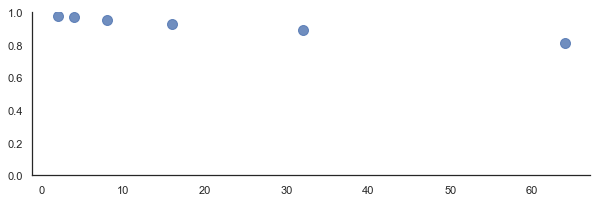

In [84]:
rb_plot(rb_data[0])

0


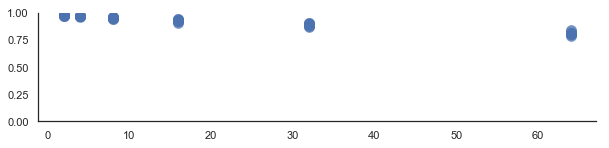

1


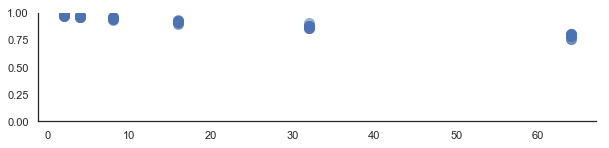

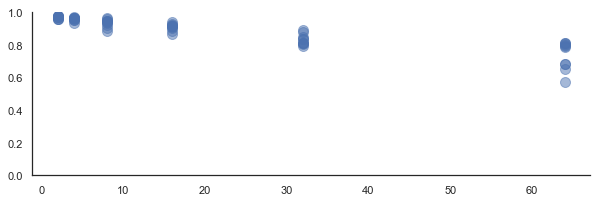

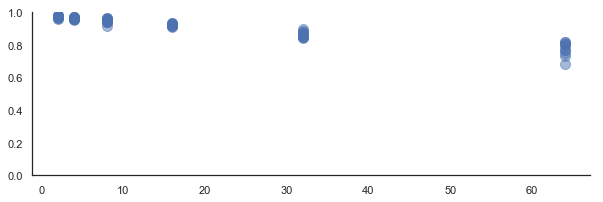

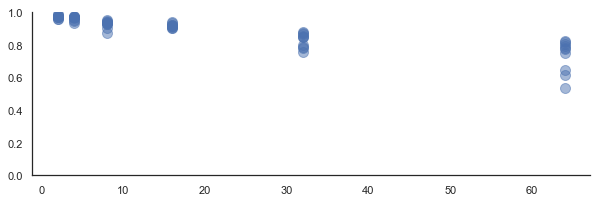

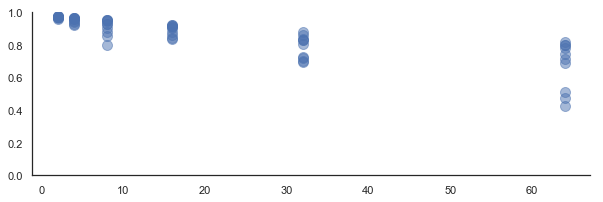

In [62]:

for i, pulse_data in enumerate([rb_data[0], rb_data[-1]]):
    plt.figure(figsize=(10,2))
    print(i)
    data = np.array([(x,y) for x,ys in zip(gate_lens, pulse_data) for y in ys ]).T
    plt.plot(data[0],1-data[1],'.',alpha = 0.5, markersize=20)
    sns.despine()
    plt.ylim(0,1)
    plt.show()

for i, pulse_data in enumerate(rb_data[1:5]):
    plt.figure(figsize=(10,3))
    data = np.array([(x,y) for x,ys in zip(gate_lens, pulse_data) for y in ys ]).T
    plt.plot(data[0],1-data[1],'.',alpha = 0.5, markersize=20)
    sns.despine()
    plt.ylim(0,1)
    plt.show()


    
# min_y,_ = plt.ylim()
# plt.ylim(min_y,1)
# plt.show()

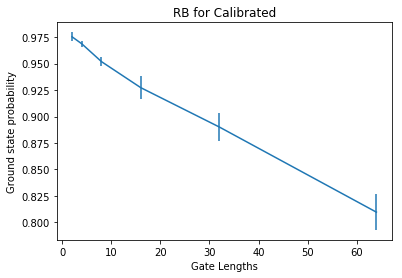

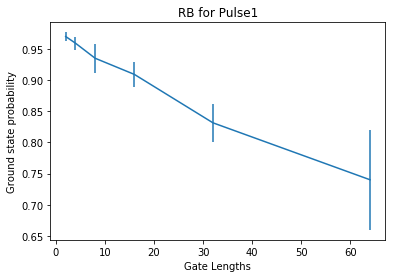

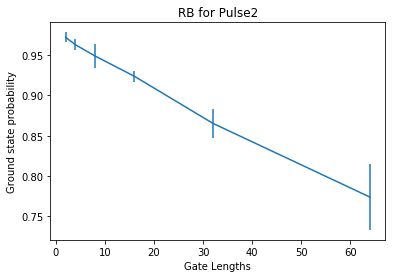

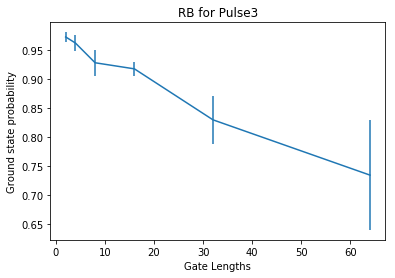

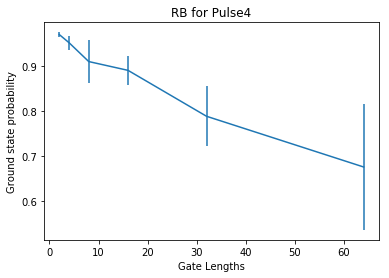

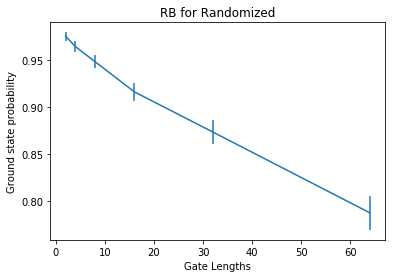

In [11]:
titles = ['Calibrated', 'Pulse1', 'Pulse2', 'Pulse3', 'Pulse4', 'Randomized']
for i, pulse_data in enumerate(rb_data):
    plt.errorbar(gate_lens, 1-np.average(pulse_data, axis=1), np.std(pulse_data, axis=1))
    plt.ylabel("Ground state probability")
    plt.xlabel('Gate Lengths')
    plt.title("RB for {}".format(titles[i]))
    plt.show()